In [1]:
import os
import csv
import numpy as np
import json
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# Load data from CSV
X = []
Y = []
directory = "dataset/"
# Labels = {'Loose_Foundation': 2, 'Normal': 0, 'Planked': 3, 'No_Run': 1, 'Overload': 4, 'Uneven_Base': 5}
Labels = {'Normal': 0,'No_Run': 1,'Loose_Foundation': 2,'Overload': 3, 'Uneven_Base': 4}
 
for file in os.listdir(directory):
    if not file.startswith('.'):
        fault_directory = os.path.join(directory, file)
        for j in os.listdir(fault_directory):
            if not j.startswith('.'):
                set_path = os.path.join(fault_directory, j)
                for k in os.listdir(set_path):
                    if not k.startswith('.'):
                        if k == 'fft.csv':
                            print('Loading...', set_path, k)
                            data_file = os.path.join(set_path, k)
                            with open(data_file, newline='') as f:
                                reader = csv.reader(f)
                                data = list(reader)[1:]  # Remove header
                                data_sensor1 = json.loads(data[0][2])
                                data_sensor2 = json.loads(data[1][2])
                                Input_set = data_sensor1['FFT_X'] + data_sensor1['FFT_Y'] + data_sensor1['FFT_Z'] + data_sensor2['FFT_X'] + data_sensor2['FFT_Y'] + data_sensor2['FFT_Z']
                                X.append(Input_set)
                                Y.append(Labels[file])
                                # if Labels[file] == 0:
                                #     Y.append(0)
                                # else:
                                #     Y.append(1)
 
X = np.array(X)
Y = np.array(Y)

print("Data loaded")
print("Number of samples:", len(X))
print("Number of labels:", len(Y))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))

Loading... dataset/Loose_Foundation\SET01_BC0000 fft.csv
Loading... dataset/Loose_Foundation\SET02_BC0000 fft.csv
Loading... dataset/Loose_Foundation\SET03_BC0100 fft.csv
Loading... dataset/Loose_Foundation\SET04_BC0100 fft.csv
Loading... dataset/Loose_Foundation\SET05_BC0200 fft.csv
Loading... dataset/Loose_Foundation\SET06_BC0200 fft.csv
Loading... dataset/Loose_Foundation\SET07_BC0300 fft.csv
Loading... dataset/Loose_Foundation\SET08_BC0300 fft.csv
Loading... dataset/Loose_Foundation\SET09_BC0400 fft.csv
Loading... dataset/Loose_Foundation\SET10_BC0400 fft.csv
Loading... dataset/Loose_Foundation\SET11_BC0500 fft.csv
Loading... dataset/Loose_Foundation\SET12_BC0500 fft.csv
Loading... dataset/Loose_Foundation\SET13_BC0550 fft.csv
Loading... dataset/Loose_Foundation\SET14_BC0550 fft.csv
Loading... dataset/Loose_Foundation\SET15_BC0050 fft.csv
Loading... dataset/Loose_Foundation\SET16_BC0050 fft.csv
Loading... dataset/Loose_Foundation\SET17_BC0150 fft.csv
Loading... dataset/Loose_Founda

Score: 0.9411764705882353
y_test: [1 2 0 0 2 0 0 0 0 2 4 0 3 4 2 2 1 0 3 0 4 3 2 0 0 4 4 2 0 4 1 2 0 4]
y_pred: [1 0 0 0 2 0 0 0 0 2 4 0 3 4 2 2 1 0 3 0 0 3 2 0 0 4 4 2 0 4 1 2 0 4]
Accuracy: 0.9411764705882353
Confusion Matrix:


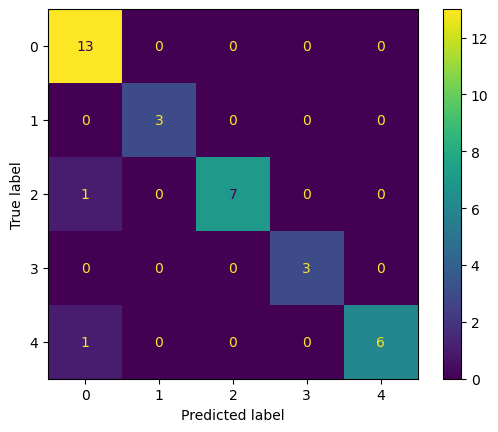

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      1.00      1.00         3
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         3
           4       1.00      0.86      0.92         7

    accuracy                           0.94        34
   macro avg       0.97      0.95      0.96        34
weighted avg       0.95      0.94      0.94        34



In [3]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
print("Score:", score)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("y_test:", y_test)
print("y_pred:", y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                         display_labels=rf_model.classes_)
disp.plot()
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Save the model
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(rf_model, f)